<a href="https://colab.research.google.com/github/wilosaurus/PCVK_2241720171/blob/main/Meet3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICUM**

**[1]**

**[2]**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**[3]**

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan Nilai Kecerahan: 50


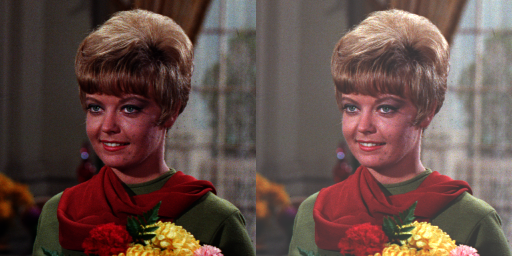

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # import cv2_imshow for displaying images in Colab

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan Nilai Kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv2.hconcat((original, brightness_image))
cv2_imshow(final_frame) # use cv2_imshow instead of cv2.imshow

TASK

[1]

 Mengubah kontras tingkat kecerahan citra 
----------------------------------
Masukkan Tingkat Kecerahan [-255 - 255]: 50


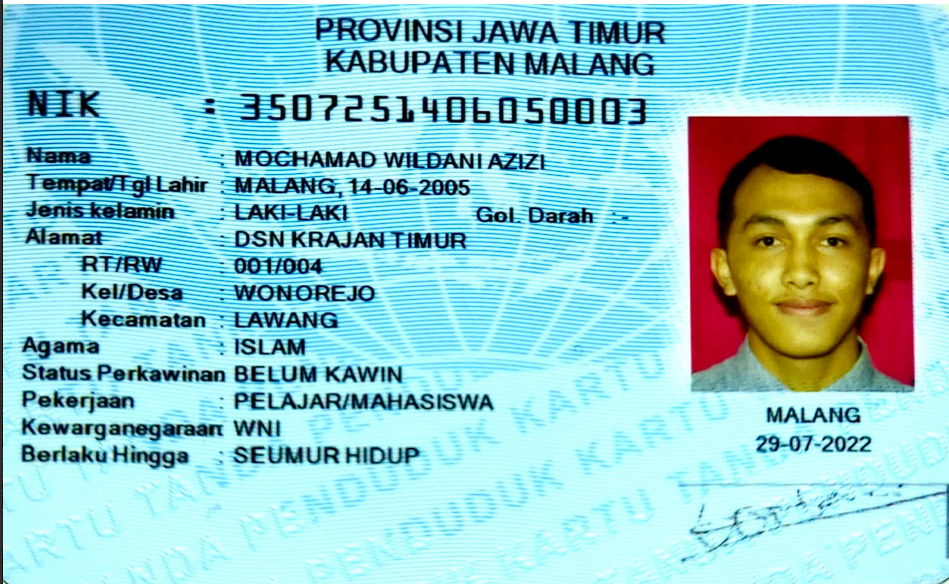

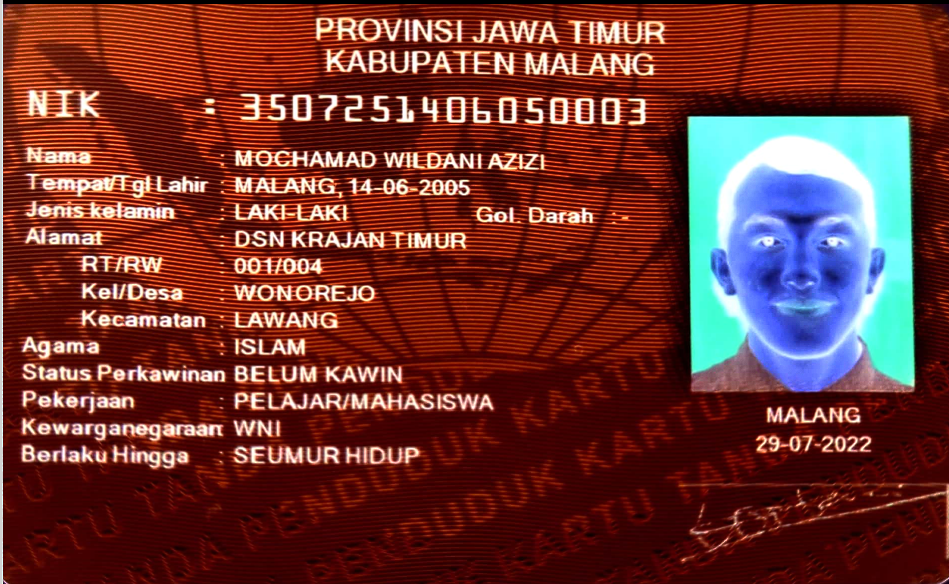

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load the image
ktp = cv.imread('/content/drive/MyDrive/image/ktp.png')

cv2_imshow(ktp)

# Invert the colors
# Note: Bitwise NOT inverts each channel separately
inverted_image = cv.bitwise_not(ktp)

# Display the inverted image
cv2_imshow(inverted_image)


[2]

 Mengubah kontras tingkat kecerahan citra 
----------------------------------
Masukkan Tingkat Kecerahan [-255 - 255]: 50


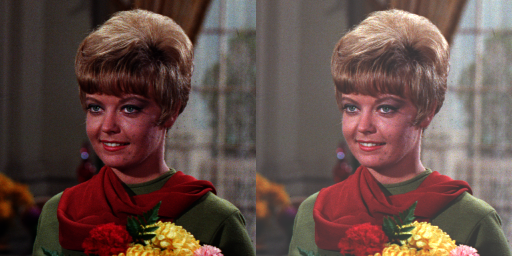

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print(' Mengubah kontras tingkat kecerahan citra ')
print('------------------------------------------')

try:
  brightness = int(input('Masukkan Tingkat Kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv2.hconcat((original, brightness_image))
cv2_imshow(final_frame) # use cv2_imshow instead of cv2.imshow


[3]

Mengubah tingkat kecerahan pada citra dengan Transformasi Log
----------------------------------
Masukkan nilai kecerahan: 50


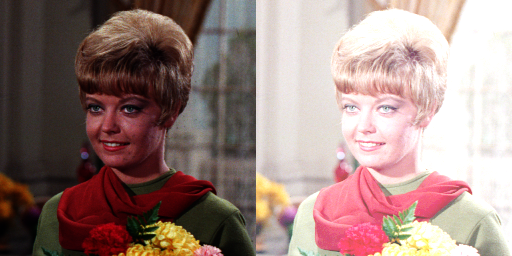

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan pada citra dengan Transformasi Log')
print('----------------------------------')

# Input kecerahan dari user
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, input bukan angka')

# Load the image
original = cv2.imread('/content/drive/MyDrive/image/female.tiff')

# Fungsi untuk melakukan transformasi logaritmik
def log_transform(image, brightness):
    # Konstanta c untuk memastikan hasil tetap dalam rentang [0, 255]
    c = 255 / np.log(1 + np.max(image))

    # Terapkan transformasi logaritmik untuk setiap piksel
    log_image = c * (np.log(1 + image))

    # Terapkan penyesuaian kecerahan setelah transformasi logaritmik
    log_image = np.clip(log_image + brightness, 0, 255)

    # Konversi hasil ke tipe uint8 (8-bit) agar sesuai format gambar
    log_image = np.array(log_image, dtype=np.uint8)

    return log_image

# Terapkan transformasi logaritmik dan kecerahan
log_image = log_transform(original, brightness)

# Gabungkan gambar asli dan gambar hasil transformasi logaritmik
final_frame = cv2.hconcat([original, log_image]) # Removed have[

# Tampilkan hasil
cv2_imshow(final_frame)

[4]

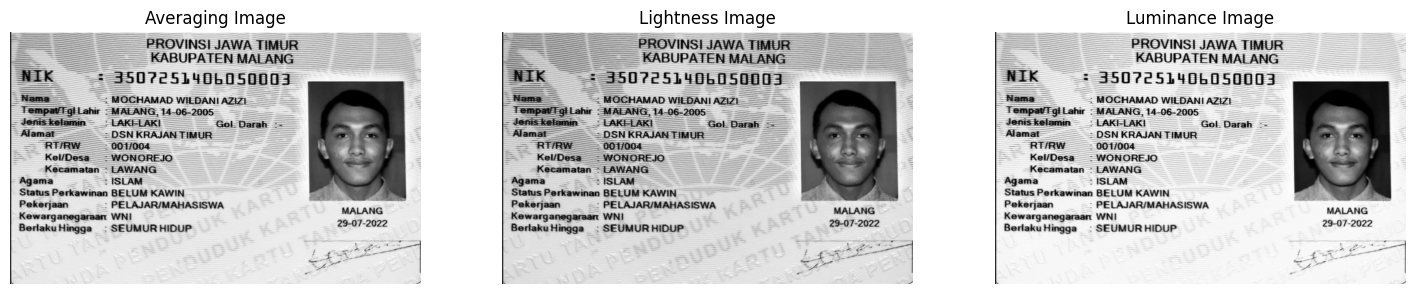

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def convert_to_averaging(image):
    # Convert image to float32 for better precision
    image = image.astype(np.float32)

    # Split the image into its R, G, and B channels
    r, g, b = cv2.split(image)

    # Calculate the average value for each pixel
    averaging = (r + g + b) / 3

    # Convert the averaging image to uint8
    averaging = np.clip(averaging, 0, 255).astype(np.uint8)

    return averaging

def convert_to_lightness(image):
    # Convert image to float32 for better precision
    image = image.astype(np.float32)

    # Split the image into its R, G, and B channels
    r, g, b = cv2.split(image)

    # Calculate the lightness value for each pixel
    lightness = (np.min([r, g, b], axis=0) + np.max([r, g, b], axis=0)) / 2

    # Convert the lightness image to uint8
    lightness = np.clip(lightness, 0, 255).astype(np.uint8)

    return lightness

def convert_to_luminance(image):
    # Convert image to float32 for better precision
    image = image.astype(np.float32)

    # Split the image into its R, G, and B channels
    r, g, b = cv2.split(image)

    # Calculate the luminance value for each pixel using the formula:
    # Luminance = 0.299*R + 0.587*G + 0.114*B
    luminance = 0.299 * r + 0.587 * g + 0.114 * b

    # Convert the luminance image to uint8
    luminance = np.clip(luminance, 0, 255).astype(np.uint8)

    return luminance

# Load your image
image = cv2.imread('/content/drive/MyDrive/image/ktp.png')

# Convert the image to grayscale using the averaging method
averaging_image = convert_to_averaging(image)

# Convert the image to grayscale using the lightness method
lightness_image = convert_to_lightness(image)

# Convert the image to grayscale using the luminance method
luminance_image = convert_to_luminance(image)

# Display the images with titles
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(averaging_image, cmap='gray')
plt.title('Averaging Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(lightness_image, cmap='gray')
plt.title('Lightness Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(luminance_image, cmap='gray')
plt.title('Luminance Image')
plt.axis('off')

plt.show()


[5]

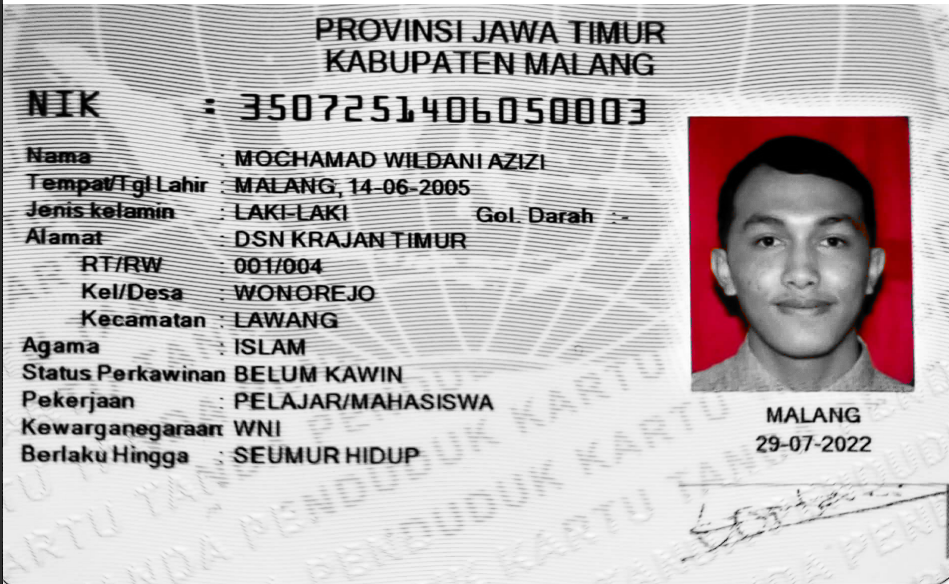

In [31]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Fungsi untuk memisahkan warna merah dan mengubah bagian lain menjadi grayscale
def isolate_red(image):
    # Mengonversi citra dari BGR ke HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Rentang warna merah dalam HSV
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # Mask untuk menangkap warna merah
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = mask1 + mask2

    # Membuat citra grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Menggabungkan warna merah dengan citra grayscale
    result = np.where(red_mask[:, :, np.newaxis] == 0, gray_bgr, image)

    return result

# Membaca citra masukan
image = cv2.imread('/content/drive/MyDrive/image/ktp.png')

# Memproses citra untuk menampilkan warna merah saja
result = isolate_red(image)

# Menampilkan hasil
cv2_imshow(result)


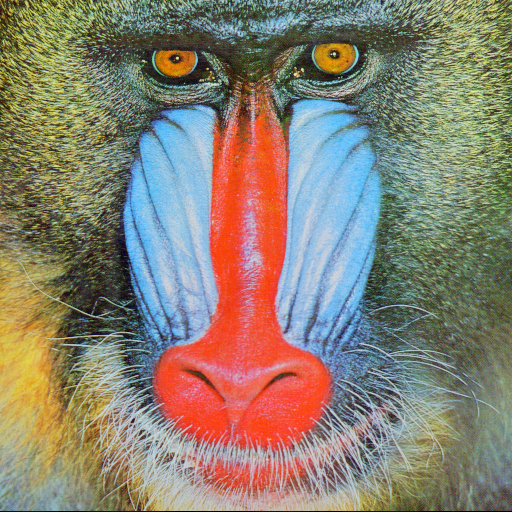

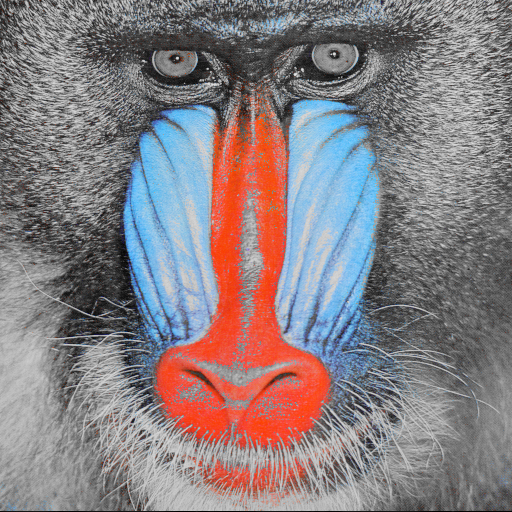

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def isolate_red_and_blue(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Rentang warna merah dan biru dalam HSV
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])

    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])

    # Combine red and blue masks
    red_mask = cv2.inRange(hsv, lower_red, upper_red)
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    combined_mask = red_mask + blue_mask

    # Menggabungkan warna merah dengan citra grayscale
    result = np.where(combined_mask[:, :, np.newaxis] == 0, gray_bgr, image)

    return result

# Membaca citra masukan
image = cv2.imread('/content/drive/MyDrive/image/mandrill.tiff')

# Process image to display only red and blue colors
result = isolate_red_and_blue(image)

# Display result
cv2_imshow(image)
cv2_imshow(result)
